# Desc

<b>The dataset is very unbalanced. </b> For example, C3S4 and C3S4 classes have only one sample. This situation is not good in respect of  using the oversampling methods. <br>

I tried to create a new class (called the other) by combining other classes which have a small sample size.
Finally, there are six classes to classify, named 'C2S1', 'C3S1', 'C3S2', 'C4S1', 'C4S2', 'Other'.


## Results

I have used optima for optimizing the model. The results were not very good. Although our model gained reasonable precision/recall scores in a few classes, some classes have bad scores.<br>

- (Test Set) R2 score : 82.851
- (Test Set) MAE : 0.207831

| class        	| precision 	| recall 	| f1-score 	| support 	|
|--------------	|-----------	|--------	|----------	|---------	|
| 0            	| 1.00      	| 0.97   	| 0.99     	| 76      	|
| 1            	| 0.97      	| 0.99   	| 0.98     	| 204     	|
| 2            	| 0.25      	| 0.17   	| 0.20     	| 6       	|
| 3            	| 0.88      	| 0.88   	| 0.88     	| 26      	|
| 4            	| 0.73      	| 0.67   	| 0.70     	| 12      	|
| 5            	| 0.62      	| 0.62   	| 0.62     	| 8       	|
| accuracy     	|           	|        	| 0.94     	| 332     	|
| macro avg    	| 0.74      	| 0.72   	| 0.73     	| 332     	|
| weighted avg 	| 0.94      	| 0.94   	| 0.94     	| 332     	|

# Install

In [84]:
# !pip install catboost
# !pip install scikit-learn
# !pip install seaborn
# !pip install numpy
# !pip install pandas
# !pip install mealpy
# !pip install pyswarms
# !pip install imbalanced-learn
# !pip install jupyterlab
# !pip install jupyter_http_over_ws
# !pip install xgboost
# # !pip install https://s3-us-west-2.amazonaws.com/xgboost-nightly-builds/release_2.0.0/xgboost-2.0.1%2Ba408254c2f0c4a39a04430f9894579038414cb31-py3-none-manylinux2014_x86_64.whl
# !pip install --upgrade --no-cache-dir gdown
# # !jupyter serverextension enable --py jupyter_http_over_ws

# Code

In [85]:
# Importing dependencies

import warnings
warnings.filterwarnings('ignore')
import re
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from catboost import CatBoostClassifier, Pool

# <span style="color:#e74c3c;"> Reading </span> Data


In [86]:
# !gdown 1SaxJ8KPMrV37ZsVTv5F5ava5aXtGRiSn
# !gdown 1E6BZ-AEncUOWlsK96SFz5wBK8w7XjmVB
# !gdown 195J88Onvr23J8HdFtO3D_Yezi97clcZ9
# !gdown 1C4ERjxVqEnxTGxwQVz98u3gaxA_hnzrH
# !gdown 10KFETqq39CXdFP2zTqPgRKOGqFuVlhL9
# !gdown 1I5c33LgqPIjtSFAThzIYFYllWgrzNTT0
# !gdown 1S6YYB6ew3CdlIT8YtMCLw-g0WJlmV6D1
# !gdown 1Xnhm2FD-mDuX6AQ-Nqs-OHd5s5zWyn3e
# !gdown 1oykno6YaFS6Fx9G8sI4RlqVnu36x693F
# !gdown 1wDqaIzte9f5KLfEOTa0r9a6QrKZ34_Yx

In [87]:
# Reading data

data1 = pd.read_csv('./ground_water_quality_2018_post.csv')
data2 = pd.read_csv('./ground_water_quality_2019_post.csv')
data3 = pd.read_csv('./ground_water_quality_2020_post.csv')
data4 = pd.read_csv('./ground_water_quality_2020_post.csv')
data5 = pd.read_csv('./ground_water_quality_2020_post.csv')
data6 = pd.read_csv('./ground_water_quality_2018_pre.csv')
data7 = pd.read_csv('./ground_water_quality_2019_pre.csv')
data8 = pd.read_csv('./ground_water_quality_2020_pre.csv')
data9 = pd.read_csv('./ground_water_quality_2020_pre.csv')
data10 = pd.read_csv('./ground_water_quality_2020_pre.csv')

In [88]:

data2.rename( columns ={ 'EC' : 'E.C', 'CO_-2 ' : 'CO3', 'HCO_ - ' :'HCO3', 'Cl -' : 'Cl',
                        'F -' : 'F', 'NO3- ': 'NO3 ' , 'SO4-2':'SO4' , 'Na+':'Na', 'K+':'K',
                        'Ca+2' : 'Ca', 'Mg+2':'Mg'}, inplace = True)

# Create a list of column names to drop
columns_to_drop = ['sno', 'season', 'Unnamed: 8']
list_data = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10]

# Loop through your dataframes and drop the columns if they exist
for df in list_data:
    for col in columns_to_drop:
        if col in df.columns:
            df.drop(col, axis=1, inplace=True)

# creating new columns
data1['year'] = 2018
data2['year'] = 2019
data3['year'] = 2020
data4['year'] = 2021
data5['year'] = 2022
data6['year'] = 2018
data7['year'] = 2019
data8['year'] = 2020
data9['year'] = 2021
data10['year'] = 2022



# handling and fixing outliers
data3['pH'].iloc[261] = data3['pH'].iloc[261].replace('8..05', '8.05')
data3['pH'] = data3['pH'].apply(pd.to_numeric)

for df in list_data:
    df['Classification'] = df['Classification'].replace(['O.G'], 'OG')

In [89]:
data_full = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10], axis = 0)
data_full.to_csv('ground_water_merge.csv', index=False)

In [90]:
len(data_full)

3645

In [91]:
# creating and applying the new_class function

def new_class(X):
    # if (X == 'C3S4') | (X == 'C2S2') | (X == 'C4S4') | (X == 'C3S3') | (X == 'C4S3') | (X == 'OG')  | (X == 'C1S1')  :
    if (X == 'C1S1'):
        return 'Sangat Baik'
    elif (X == 'C1S2') | (X == 'C2S1') | (X == 'C2S2'):
        return 'Baik'
    elif (X == 'C1S3') | (X == 'C3S1'):
        return 'Boleh Digunakan'
    elif (X == 'C2S3') | (X == 'C3S2') | (X == 'C3S3'):
        return 'Marginal'
    elif (X == 'C1S4') | (X == 'C2S4') | (X == 'C3S4') | (X == 'C4S1') | (X == 'C4S2'):
        return 'Buruk'
    elif  (X == 'C4S3') | (X == 'C4S4') :
        return 'Sangat Buruk'
    elif ( X == 'OG') | (X == "BELOW THE GRAPH") :
        return 'Other'
    else:
        return X

data_full['Classification'] = data_full['Classification'].apply(new_class)

In [92]:
def rsc_class(x):
    if x < 1.25:
        return 2
    elif 1.25 <= x <= 2.5:
        return 1
    else:
        return 0

data_full['rsc_class'] = data_full['RSC  meq  / L'].apply(rsc_class)

In [93]:
def tds_class(x):
    if x < 1000:
        return 5
    elif 1000 <= x < 3000:
        return 4
    elif 3000 <= x < 5000:
        return 3
    elif 5000 <= x < 7000:
        return 2
    elif 7000 <= x < 10000:
        return 1
    else:
        return 0

data_full['tds_class'] = data_full['TDS'].apply(tds_class)

In [94]:
# cols2drop = ['district','mandal', 'village', 'lat_gis', 'long_gis', 'Classification.1', 'Unnamed: 8']
cols2drop = ['district', 'mandal', 'village', 'Classification.1', 'temp_id', 'E.C', 'TDS', 'T.H']
# cols2drop = ['Classification.1', 'Unnamed: 8']
data_full_copy = data_full
data_full = data_full[data_full['Classification'] != 'Other']
data_full = data_full[data_full['pH'] != "Sample Leaked Out"]
data_full['pH'] = data_full['pH'].replace('8..05', '8.05')
data_full['pH'] = data_full['pH'].apply(pd.to_numeric)

data_full = data_full.drop(cols2drop, axis=1)

In [95]:
len(data_full)

3630

In [96]:
class_distribution = data_full['Classification'].value_counts()
# check class distribution
print(class_distribution)

Classification
Boleh Digunakan    2314
Baik                796
Buruk               356
Marginal            104
Sangat Buruk         43
Sangat Baik          16
Name: count, dtype: int64


In [97]:
# total null elements

data_full.isnull().sum()[data_full.isnull().sum() > 0]

gwl                48
CO3               161
HCO3                1
Cl                  1
F                   1
NO3                 1
SO4                 1
Na                  1
K                   1
Ca                  1
Mg                  1
SAR                 1
Classification      1
RSC  meq  / L       1
dtype: int64

In [98]:
# imputing null values

imp_knn = KNNImputer(n_neighbors=3)

data_full['CO3'] = imp_knn.fit_transform(np.array(data_full['CO3']).reshape(-1,1) )
data_full['gwl'] = imp_knn.fit_transform(np.array(data_full['gwl']).reshape(-1,1) )

In [99]:
data_full.isnull().sum()[data_full.isnull().sum() > 0]

HCO3              1
Cl                1
F                 1
NO3               1
SO4               1
Na                1
K                 1
Ca                1
Mg                1
SAR               1
Classification    1
RSC  meq  / L     1
dtype: int64

In [100]:
data_full = data_full.dropna()

In [101]:
data_full.head()

,lat_gis,long_gis,gwl,pH,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,SAR,Classification,RSC meq / L,year,rsc_class,tds_class
0,19.668300,78.524700,5.09,8.28,0.0,220.0,60.0,0.44,42.276818,46.0,49.0,4.0,48.0,38.896,1.273328,Baik,-1.198684,2018,2,5
1,19.458888,78.350833,5.10,8.29,0.0,230.0,80.0,0.56,100.659091,68.0,42.0,5.0,56.0,63.206,0.913166,Boleh Digunakan,-3.397862,2018,2,5
2,19.525555,78.512222,4.98,7.69,0.0,200.0,30.0,0.66,41.471545,44.0,45.0,2.0,24.0,38.896,1.319284,Baik,-0.398684,2018,2,5
3,19.730555,78.640000,5.75,8.09,0.0,160.0,10.0,0.58,10.669864,35.0,27.0,1.0,32.0,19.448,0.928155,Baik,0.000658,2018,2,5
4,19.495665,78.852654,2.15,8.21,0.0,300.0,340.0,2.56,128.843636,280.0,298.0,5.0,56.0,92.378,5.682664,Buruk,-4.396875,2018,2,4


In [102]:
# creating train data and target

X = data_full.copy()
X.drop('Classification', axis= 1, inplace = True)

y = data_full['Classification']

In [103]:
X.dtypes

lat_gis          float64
long_gis         float64
gwl              float64
pH               float64
CO3              float64
HCO3             float64
Cl               float64
F                float64
NO3              float64
SO4              float64
Na               float64
K                float64
Ca               float64
Mg               float64
SAR              float64
RSC  meq  / L    float64
year               int64
rsc_class          int64
tds_class          int64
dtype: object

In [104]:
pd.value_counts(y)

Classification
Boleh Digunakan    2314
Baik                796
Buruk               356
Marginal            104
Sangat Buruk         43
Sangat Baik          16
Name: count, dtype: int64

In [105]:
LB = LabelEncoder()
y = LB.fit_transform(y)
LB.classes_

array(['Baik', 'Boleh Digunakan', 'Buruk', 'Marginal', 'Sangat Baik',
       'Sangat Buruk'], dtype=object)

In [106]:
original_classes = LB.inverse_transform(y)
np.unique(original_classes)

array(['Baik', 'Boleh Digunakan', 'Buruk', 'Marginal', 'Sangat Baik',
       'Sangat Buruk'], dtype=object)

In [107]:
# categorical features

cat_feat_idx =  np.where(X.dtypes == 'object')[0]
cat_feat_idx

array([], dtype=int64)

In [108]:
# scaling numerical data

MX = MinMaxScaler()
X.iloc[:, 3:21] = MX.fit_transform(X.iloc[:, 3:21])

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33 , shuffle = True, stratify=y, random_state= 42)

print(X_train.shape)
print(X_test.shape)

(2431, 19)
(1198, 19)


In [110]:
# balancing class
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
#SMOTE Training data

In [111]:
y_class = np.unique(y_train)
y_class

array([0, 1, 2, 3, 4, 5])

In [112]:
# creating class weights

unique_classes = np.unique(y)
weights = compute_class_weight(class_weight='balanced', classes=unique_classes, y=y_train)
class_weights = dict(zip(unique_classes, weights))
class_weights

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0}

In [113]:
# creating pools for training and testing

train_pool = Pool(X_train, y_train, cat_features = cat_feat_idx)
test_pool = Pool(X_test, y_test, cat_features = cat_feat_idx)

In [114]:
device_type = 'CPU'

## Base

### XGBoost

In [115]:
import xgboost as xgb
import matplotlib.pyplot as plt

In [116]:
# xgb_model = xgb.XGBClassifier(booster='gbtree', n_estimators = 3000, enable_categorical=False, device="cuda", eta=0.02295, subsample=0.6, colsample_bytree=0.6, max_depth=4, gamma=0.4, metrics=['aucpr'], num_class=6)
xgb_model = xgb.XGBClassifier()


In [117]:
eval_set = [(X_test, y_test)]
xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="mlogloss", eval_set=eval_set, verbose=True)

[0]	validation_0-mlogloss:1.14273
[1]	validation_0-mlogloss:0.85927
[2]	validation_0-mlogloss:0.67559
[3]	validation_0-mlogloss:0.55250
[4]	validation_0-mlogloss:0.45787
[5]	validation_0-mlogloss:0.38928
[6]	validation_0-mlogloss:0.33715
[7]	validation_0-mlogloss:0.29525
[8]	validation_0-mlogloss:0.26428
[9]	validation_0-mlogloss:0.24200
[10]	validation_0-mlogloss:0.22508
[11]	validation_0-mlogloss:0.20998
[12]	validation_0-mlogloss:0.19925
[13]	validation_0-mlogloss:0.19107
[14]	validation_0-mlogloss:0.18377
[15]	validation_0-mlogloss:0.17894
[16]	validation_0-mlogloss:0.17473
[17]	validation_0-mlogloss:0.17184
[18]	validation_0-mlogloss:0.16783
[19]	validation_0-mlogloss:0.16280
[20]	validation_0-mlogloss:0.16027
[21]	validation_0-mlogloss:0.15869
[22]	validation_0-mlogloss:0.15705
[23]	validation_0-mlogloss:0.15583
[24]	validation_0-mlogloss:0.15493
[25]	validation_0-mlogloss:0.15208
[26]	validation_0-mlogloss:0.14929
[27]	validation_0-mlogloss:0.14867
[28]	validation_0-mlogloss:0.1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=3000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [118]:
from sklearn.metrics import mean_squared_error

preds = xgb_model.predict(X_test)

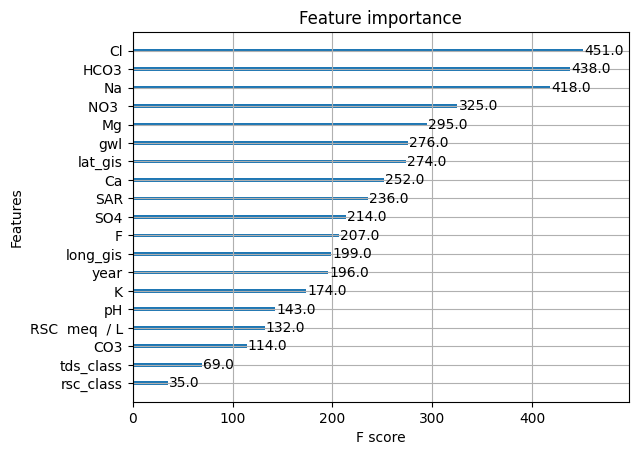

<Figure size 1600x1200 with 0 Axes>

In [119]:
xgb.plot_importance(xgb_model)
plt.figure(figsize = (16, 12))
plt.show()

In [120]:
rmse = mean_squared_error(y_test, preds, squared=False)

print(f"RMSE of the base model: {rmse:.3f}")

RMSE of the base model: 0.361


### <span style="color:#e74c3c;"> CatBoost </span> Classifier


In [121]:
# cb_model = CatBoostClassifier(iterations= 6000, task_type=device_type, devices='0:1', learning_rate = 0.0039, depth=5, l2_leaf_reg=0.3, min_data_in_leaf = 27, class_weights=class_weights)
cb_model = CatBoostClassifier(task_type=device_type, devices='0:1', class_weights=class_weights)


cb_model.fit(train_pool, verbose = 1000 )

Learning rate set to 0.035039
0:	learn: 1.6562694	total: 15.8ms	remaining: 47.4s
1000:	learn: 0.0215121	total: 13.3s	remaining: 26.6s
2000:	learn: 0.0089326	total: 27s	remaining: 13.5s
2999:	learn: 0.0050329	total: 41.6s	remaining: 0us


In [122]:
importances = cb_model.get_feature_importance(type='PredictionValuesChange')
feature_importances = pd.Series(importances, index=X.columns).sort_values()

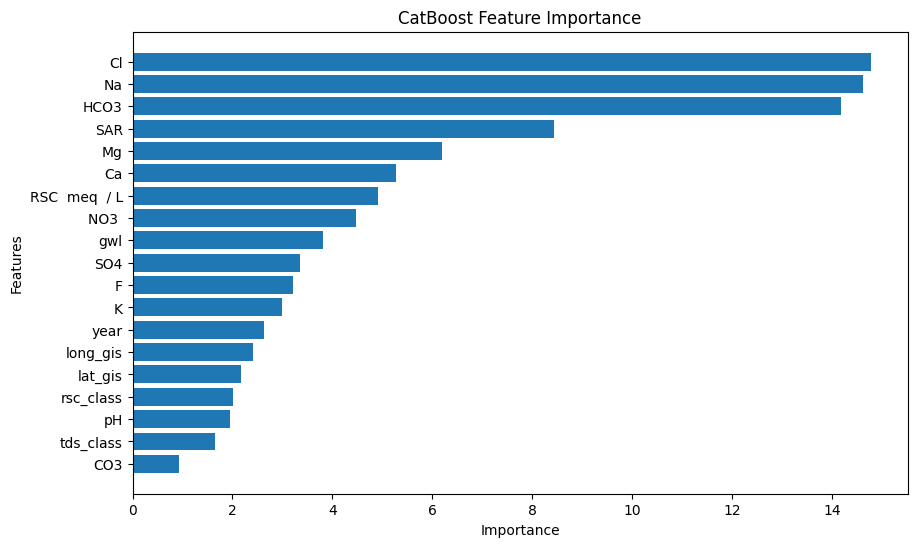

In [123]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances.values)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## Swarm Intelligence

### PSO

In [124]:
import pyswarms as ps
from mealpy import FloatVar, PSO

In [125]:
pso_iteration = 20

In [126]:
# Define the hyperparameter search space
hyperparameter_ranges_xgb = {
    'n_estimators': (1000, 5000),  # Reduce the range of boosting iterations
    'max_depth': (2, 10),           # Reduce the range of tree depth
    'learning_rate': (0.001, 0.1),  # Reduce the learning rate range
    'subsample': (0.1, 1.0),
    'colsample_bytree': (0.1, 1.0),     # Reduce the range of regularization strength
    'gamma' : (0.1, 1.0),
}

In [127]:
# Define the hyperparameter search space
hyperparameter_ranges_cb = {
    'iterations': (1000, 6000),  # Reduce the range of boosting iterations
    'depth': (2, 6),           # Reduce the range of tree depth
    'learning_rate': (0.001, 0.1),  # Reduce the learning rate range
    'min_data_in_leaf': (25, 35),
    'l2_leaf_reg': (1, 16),      # Reduce the range of regularization strength
}

In [128]:
def objective_function_xgb(x):
    # Round the elements of x to integers
    # x = x.astype(int)
    x = x.reshape(-1)  # Ensure x is a 1D array
    params = {
        'n_estimators': int(x[0]),
        'max_depth': int(x[1]),
        'learning_rate': float(x[2]),
        'subsample': float(x[3]),
        'colsample_bytree': float(x[4]),
        'gamma': float(x[5]),
        'min_child_weight': int(x[6]),
        'reg_alpha': float(x[7]),
        # 'device': 'cuda:0',
        # 'tree_method':'gpu_hist',
        # 'predictor': 'gpu_predictor',
        'verbose': 0,
    }

    xgbof_model = xgb.XGBClassifier(**params)
    xgbof_model.fit(X_train, y_train, verbose = 1000)
    y_pred =  xgbof_model.predict(X_test)
    #Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    #Precision
    precision = precision_score(y_test, y_pred, average="macro")
    #Recall
    recall = recall_score(y_test, y_pred, average="macro")
    return -precision, -recall, -accuracy

In [133]:
problem_dict_xgb = {
    "bounds": FloatVar(lb=(100, 2, 0.001, 0.1, 0.1, 0.1, 2, 0.001), ub=(8000, 10, 0.1, 1.0, 1.0, 1.0, 12, 0.1), name="delta"),
    "minmax": "min",
    "obj_func": objective_function_xgb,
    "obj_weights": [1.0,1.0,0.7]
}

In [134]:
def objective_function_cb(x):
    # Round the elements of x to integers
    # x = x.astype(int)
    x = x.reshape(-1)  # Ensure x is a 1D array
    params = {
        'iterations': int(x[0]),
        'depth': int(x[1]),
        'learning_rate': float(x[2]),
        'min_data_in_leaf': int(x[3]),
        'l2_leaf_reg': float(x[4]),
        'loss_function': 'MultiClass',
        'class_weights': class_weights,
        'task_type': device_type,
        'devices': '0:1',
        'cat_features': cat_feat_idx,
        'verbose': 0,
    }

    cbof_model = CatBoostClassifier(**params)
    cbof_model.fit(train_pool)
    y_pred = cbof_model.predict(X_test)
    #Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    #Precision
    precision = precision_score(y_test, y_pred, average="macro")
    #Recall
    recall = recall_score(y_test, y_pred, average="macro")
    return -precision, -recall, -accuracy

In [135]:
problem_dict_cb = {
    "bounds": FloatVar(lb=(100, 3, 0.001, 20, 0.1), ub=(4000, 6, 0.1, 35, 1.0), name="delta"),
    "minmax": "min",
    "obj_func": objective_function_cb,
    "obj_weights": [1.0,1.0,0.7]
}

#### OF XGBoost

In [136]:
model_pso_xgb = PSO.OriginalPSO(epoch=20, pop_size=20, c1=2.05, c2=2.05, w=0.7)
g_best_pso_xgb = model_pso_xgb.solve(problem_dict_xgb)

2023-11-09 08:19:48,993 - mealpy.swarm_based.PSO.OriginalPSO - INFO - Solving 3-objective optimization problem with weights: [1.  1.  0.7].
2023-11-09 08:28:24,502 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 1, Current best: -2.4915108182660606, Global best: -2.4915108182660606, Runtime: 219.80814 seconds
2023-11-09 08:32:05,011 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 2, Current best: -2.4960652001929984, Global best: -2.4960652001929984, Runtime: 220.50525 seconds
2023-11-09 08:36:32,115 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 3, Current best: -2.508889254279261, Global best: -2.508889254279261, Runtime: 267.10178 seconds
2023-11-09 08:42:14,473 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 4, Current best: -2.508889254279261, Global best: -2.508889254279261, Runtime: 342.35501 seconds
2023-11-09 08:47:05,821 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 5, Curre

In [137]:
print(f"Solution: {g_best_pso_xgb.solution}, Fitness: {g_best_pso_xgb.target.fitness}")

Solution: [4.85913610e+03 5.23496407e+00 3.59895246e-02 9.65198396e-01
 3.40472510e-01 3.58670936e-01 2.29865251e+00 8.06319275e-02], Fitness: -2.5125187586947635


In [138]:
print("Best hyperparameters:", g_best_pso_xgb.target.fitness)
print("n_estimators:", int(g_best_pso_xgb.solution[0]))
print("max_depth:", int(g_best_pso_xgb.solution[1]))
print("learning_rate:", float(g_best_pso_xgb.solution[2]))
print("subsample:", float(g_best_pso_xgb.solution[3]))
print("colsample_bytree:", float(g_best_pso_xgb.solution[4]))
print("gamma:", float(g_best_pso_xgb.solution[5]))
print("min_child_weight:", float(g_best_pso_xgb.solution[6]))
print("reg_alpha:", float(g_best_pso_xgb.solution[7]))

Best hyperparameters: -2.5125187586947635
n_estimators: 4859
max_depth: 5
learning_rate: 0.03598952458635338
subsample: 0.9651983963801276
colsample_bytree: 0.3404725104854119
gamma: 0.3586709361597144
min_child_weight: 2.298652512251719
reg_alpha: 0.08063192748775684


In [139]:
# Define the best hyperparameters as a dictionary
best_hyperparameters_pso_xgb = {
    'n_estimators': int(g_best_pso_xgb.solution[0]),
    'max_depth': int(g_best_pso_xgb.solution[1]),
    'learning_rate': float(g_best_pso_xgb.solution[2]),
    'subsample': float(g_best_pso_xgb.solution[3]),
    "colsample_bytree": float(g_best_pso_xgb.solution[4]),
    "gamma": float(g_best_pso_xgb.solution[5]),
    'min_child_weight': int(g_best_pso_xgb.solution[6]),
    'reg_alpha': float(g_best_pso_xgb.solution[7]),
    # 'device': 'cuda:0',
    # 'tree_method':'gpu_hist',
    # 'predictor': 'gpu_predictor',
    'verbose': 0,
}

In [140]:
# Create a XGB classifier with the best hyperparameters
pso_xgb_model = xgb.XGBClassifier(**best_hyperparameters_pso_xgb)

# Train the model on your training data
pso_xgb_model.fit(X_train, y_train, verbose = 1000 )

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3404725104854119, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.3586709361597144,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03598952458635338,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=4859, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

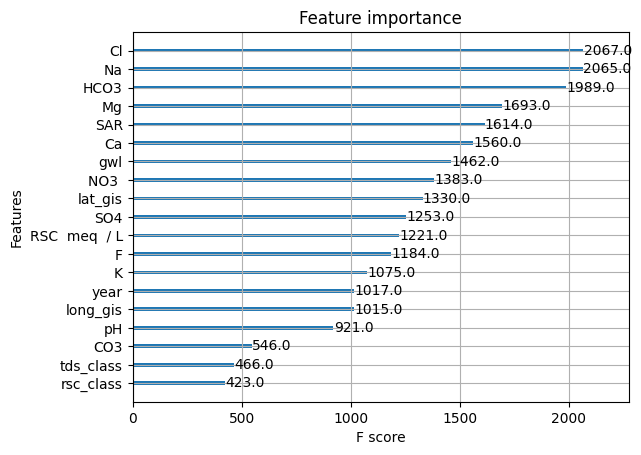

<Figure size 1600x1200 with 0 Axes>

In [141]:
xgb.plot_importance(pso_xgb_model)
plt.figure(figsize = (16, 12))
plt.show()

#### OF Catboost

In [142]:
n_particles = 20
n_dimensions = len(hyperparameter_ranges_cb)
# bounds = (np.array([100, 3, 0.01, 1]), np.array([500, 8, 0.1, 5]))
bounds = (np.array([100, 2, 0.001, 25, 1]), np.array([4000, 16, 0.1, 35, 10]))


In [143]:
# best_hyperparameters = optimizer.optimize(objective_function, iters=pso_iteration)


In [144]:
model_pso_cb = PSO.OriginalPSO(epoch=20, pop_size=20, c1=2.05, c2=2.05, w=0.7)
g_best_pso_cb = model_pso_cb.solve(problem_dict_cb)

2023-11-09 10:06:34,381 - mealpy.swarm_based.PSO.OriginalPSO - INFO - Solving 3-objective optimization problem with weights: [1.  1.  0.7].
2023-11-09 10:15:57,818 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 1, Current best: -2.5154273730219403, Global best: -2.5154273730219403, Runtime: 264.08663 seconds
2023-11-09 10:19:04,084 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 2, Current best: -2.5154273730219403, Global best: -2.5154273730219403, Runtime: 186.26220 seconds
2023-11-09 10:21:35,639 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 3, Current best: -2.519898841787311, Global best: -2.519898841787311, Runtime: 151.55263 seconds
2023-11-09 10:24:37,465 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 4, Current best: -2.519898841787311, Global best: -2.519898841787311, Runtime: 181.82438 seconds
2023-11-09 10:28:24,382 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 5, Curre

In [ ]:
print(f"Solution: {g_best_pso_cb.solution}, Fitness: {g_best_pso_cb.target.fitness}")

Solution: [3.22251053e+03 4.83226958e+00 9.24409951e-02 2.97572993e+01
 2.11917090e-01], Fitness: -0.9682804674457429


In [ ]:
len(g_best_pso_cb.solution)

5

In [ ]:
# best_accuracy, best_hyperparameter_values = best_hyperparameters

In [ ]:
# Now, best_hyperparameter_values is an array of hyperparameter values
# You can print it to see the best hyperparameters
# print("Best accuracy:", -best_accuracy)
print("Best hyperparameters:", g_best_pso_cb.target.fitness)
print("iteration:", int(g_best_pso_cb.solution[0]))
print("depth:", int(g_best_pso_cb.solution[1]))
print("learning_rate:", float(g_best_pso_cb.solution[2]))
print("min_data_in_leaf:", int(g_best_pso_cb.solution[3]))
print("l2_leaf_reg:", float(g_best_pso_cb.solution[4]))


Best hyperparameters: -0.9682804674457429
iteration: 3222
depth: 4
learning_rate: 0.09244099508093619
min_data_in_leaf: 29
l2_leaf_reg: 0.21191709049563523


In [ ]:
# Define the best hyperparameters as a dictionary
best_hyperparameters_pso_cb = {
    'iterations': int(g_best_pso_cb.solution[0]),
    'depth': int(g_best_pso_cb.solution[1]),
    'learning_rate': float(g_best_pso_cb.solution[2]),
    'min_data_in_leaf': int(g_best_pso_cb.solution[3]),
    "l2_leaf_reg": float(g_best_pso_cb.solution[4]),
    'class_weights': class_weights,  # Assuming you have class_weights defined
    'task_type': device_type,
    'devices': '0:1',
    'cat_features': cat_feat_idx,
    'verbose': 0,
}

In [ ]:
# Create a CatBoost classifier with the best hyperparameters
pso_cb_model = CatBoostClassifier(**best_hyperparameters_pso_cb)

# Train the model on your training data
pso_cb_model.fit(train_pool , verbose = 1000 )

0:	learn: 1.5155937	total: 4.64ms	remaining: 15s
1000:	learn: 0.0057943	total: 3.5s	remaining: 7.78s
2000:	learn: 0.0015843	total: 9.81s	remaining: 5.98s
3000:	learn: 0.0007532	total: 13.6s	remaining: 1s
3221:	learn: 0.0006676	total: 14.5s	remaining: 0us


In [ ]:
importances = pso_cb_model.get_feature_importance(type='PredictionValuesChange')
feature_importances = pd.Series(importances, index=X.columns).sort_values()

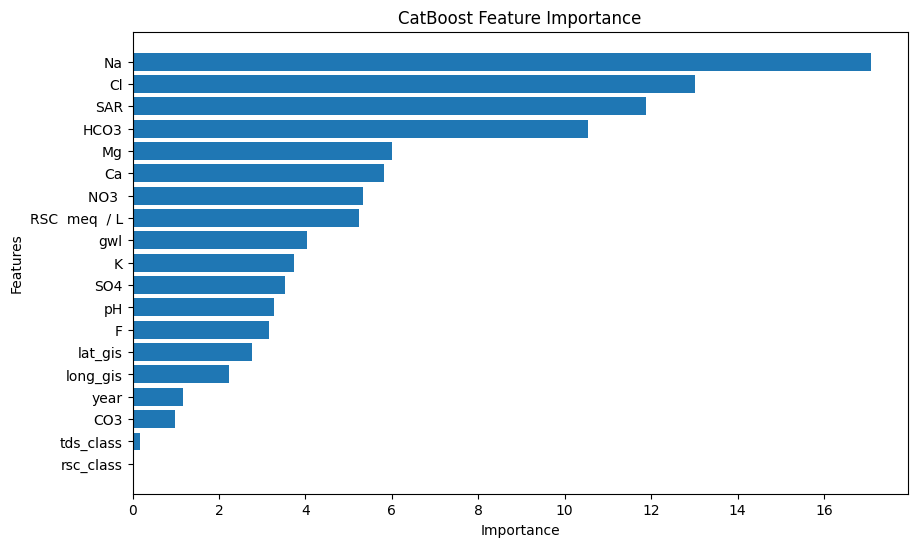

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances.values)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

### ABC

In [ ]:
from mealpy import FloatVar, ABC

#### XGB

In [ ]:
abc_xgb_model = ABC.OriginalABC(epoch=20, pop_size=20, n_limits = 25)
g_best_abc_xgb = abc_xgb_model.solve(problem_dict_xgb)


2023-11-08 08:33:54,838 - mealpy.swarm_based.ABC.OriginalABC - INFO - Solving single objective optimization problem.
2023-11-08 08:44:12,096 - mealpy.swarm_based.ABC.OriginalABC - INFO - >>>Problem: P, Epoch: 1, Current best: -0.9649415692821369, Global best: -0.9649415692821369, Runtime: 422.44449 seconds
2023-11-08 08:53:06,692 - mealpy.swarm_based.ABC.OriginalABC - INFO - >>>Problem: P, Epoch: 2, Current best: -0.9649415692821369, Global best: -0.9649415692821369, Runtime: 534.59311 seconds
2023-11-08 09:01:18,585 - mealpy.swarm_based.ABC.OriginalABC - INFO - >>>Problem: P, Epoch: 3, Current best: -0.9666110183639399, Global best: -0.9666110183639399, Runtime: 491.89043 seconds
2023-11-08 09:09:05,390 - mealpy.swarm_based.ABC.OriginalABC - INFO - >>>Problem: P, Epoch: 4, Current best: -0.9674457429048414, Global best: -0.9674457429048414, Runtime: 466.79946 seconds
2023-11-08 09:16:51,735 - mealpy.swarm_based.ABC.OriginalABC - INFO - >>>Problem: P, Epoch: 5, Current best: -0.9674457

In [ ]:
print(f"Solution: {g_best_abc_xgb.solution}, Fitness: {g_best_abc_xgb.target.fitness}")

Solution: [8.00000000e+03 1.00000000e+01 7.75921449e-02 1.00000000e+00
 2.13741214e-01 1.93554796e-01 3.74447029e+00 1.00000000e-01], Fitness: -0.9716193656093489


In [ ]:
print("Best hyperparameters:", g_best_abc_xgb.target.fitness)
print("n_estimators:", int(g_best_abc_xgb.solution[0]))
print("max_depth:", int(g_best_abc_xgb.solution[1]))
print("learning_rate:", float(g_best_abc_xgb.solution[2]))
print("subsample:", float(g_best_abc_xgb.solution[3]))
print("colsample_bytree:", float(g_best_abc_xgb.solution[4]))
print("gamma:", float(g_best_abc_xgb.solution[5]))
print("min_child_weight:", float(g_best_abc_xgb.solution[6]))
print("reg_alpha:", float(g_best_abc_xgb.solution[7]))

Best hyperparameters: -0.9716193656093489
n_estimators: 8000
max_depth: 10
learning_rate: 0.07759214491264169
subsample: 1.0
colsample_bytree: 0.21374121352090816
gamma: 0.1935547960993547
min_child_weight: 3.7444702911596655
reg_alpha: 0.1


In [ ]:
# Define the best hyperparameters as a dictionary
best_hyperparameters_abc_xgb = {
    'n_estimators': int(g_best_abc_xgb.solution[0]),
    'max_depth': int(g_best_abc_xgb.solution[1]),
    'learning_rate': float(g_best_abc_xgb.solution[2]),
    'subsample': float(g_best_abc_xgb.solution[3]),
    "colsample_bytree": float(g_best_abc_xgb.solution[4]),
    "gamma": float(g_best_abc_xgb.solution[5]),
    'min_child_weight': int(g_best_abc_xgb.solution[6]),
    'reg_alpha': float(g_best_abc_xgb.solution[7]),
    # 'device': 'cuda:0',
    # 'tree_method':'gpu_hist',
    # 'predictor': 'gpu_predictor',
    'verbose': 0,
}

In [ ]:
# Create a XGB classifier with the best hyperparameters
abc_xgb_model = xgb.XGBClassifier(**best_hyperparameters_abc_xgb)

# Train the model on your training data
abc_xgb_model.fit(X_train, y_train, verbose = 1000 )

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.21374121352090816, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.1935547960993547,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.07759214491264169,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=8000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

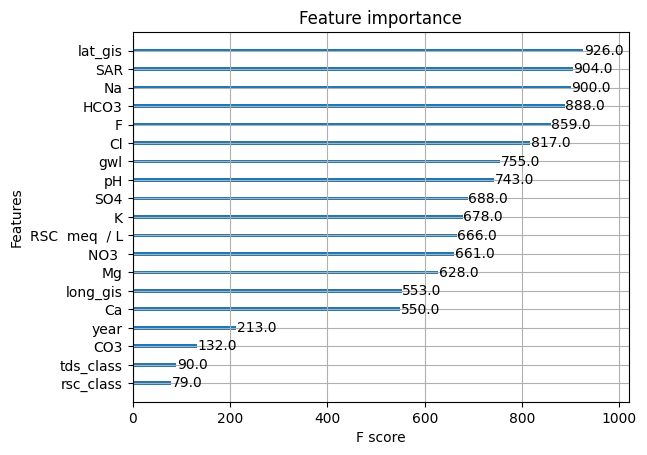

<Figure size 1600x1200 with 0 Axes>

In [ ]:
xgb.plot_importance(abc_xgb_model)
plt.figure(figsize = (16, 12))
plt.show()

#### CatBoost

In [ ]:
abc_cb_model = ABC.OriginalABC(epoch=10, pop_size=20, n_limits = 25)
g_best_abc_cb = abc_cb_model.solve(problem_dict_cb)


0:	learn: 1.7651375	total: 6.3ms	remaining: 23.1s
1000:	learn: 0.1167538	total: 7.75s	remaining: 20.6s
2000:	learn: 0.0644135	total: 13.4s	remaining: 11.2s
3000:	learn: 0.0443712	total: 21s	remaining: 4.65s


2023-11-08 11:34:19,317 - mealpy.swarm_based.ABC.OriginalABC - INFO - Solving single objective optimization problem.


3663:	learn: 0.0363929	total: 24.8s	remaining: 0us
0:	learn: 1.6129865	total: 9.34ms	remaining: 30.9s
1000:	learn: 0.0023852	total: 11.3s	remaining: 26.1s
2000:	learn: 0.0005723	total: 22.5s	remaining: 14.7s
3000:	learn: 0.0002789	total: 31.9s	remaining: 3.26s
3307:	learn: 0.0002385	total: 36.5s	remaining: 0us
0:	learn: 1.5983763	total: 5.85ms	remaining: 603ms
103:	learn: 0.1437445	total: 586ms	remaining: 0us
0:	learn: 1.6418696	total: 9.6ms	remaining: 32.4s
1000:	learn: 0.0136018	total: 10.9s	remaining: 25.9s
2000:	learn: 0.0048197	total: 20.4s	remaining: 14s
3000:	learn: 0.0026199	total: 31.3s	remaining: 3.9s
3374:	learn: 0.0022074	total: 36s	remaining: 0us
0:	learn: 1.6088986	total: 13.7ms	remaining: 40.2s
1000:	learn: 0.0057849	total: 10.4s	remaining: 20s
2000:	learn: 0.0018188	total: 21.6s	remaining: 10s
2930:	learn: 0.0010293	total: 32s	remaining: 0us
0:	learn: 1.6043116	total: 6.08ms	remaining: 10.8s
1000:	learn: 0.0142123	total: 5.69s	remaining: 4.45s
1783:	learn: 0.0060681	tot

2023-11-08 11:50:14,177 - mealpy.swarm_based.ABC.OriginalABC - INFO - >>>Problem: P, Epoch: 1, Current best: -0.9674457429048414, Global best: -0.9674457429048414, Runtime: 643.08762 seconds


99:	learn: 0.3283538	total: 585ms	remaining: 0us
0:	learn: 1.5888200	total: 9.17ms	remaining: 36.7s
1000:	learn: 0.0017167	total: 9.87s	remaining: 29.6s
2000:	learn: 0.0004263	total: 20.3s	remaining: 20.3s
3000:	learn: 0.0002154	total: 31.4s	remaining: 10.4s
3999:	learn: 0.0001383	total: 42.3s	remaining: 0us
0:	learn: 1.5903066	total: 5.79ms	remaining: 574ms
99:	learn: 0.1365900	total: 557ms	remaining: 0us
0:	learn: 1.6127995	total: 5.79ms	remaining: 12.3s
1000:	learn: 0.0161831	total: 5.6s	remaining: 6.31s
2000:	learn: 0.0057918	total: 13.2s	remaining: 842ms
2128:	learn: 0.0052752	total: 13.9s	remaining: 0us
0:	learn: 1.6856752	total: 5.85ms	remaining: 23.4s
1000:	learn: 0.0204470	total: 6.24s	remaining: 18.7s
2000:	learn: 0.0062311	total: 13.2s	remaining: 13.1s
3000:	learn: 0.0030000	total: 19.3s	remaining: 6.42s
3999:	learn: 0.0017598	total: 26.4s	remaining: 0us
0:	learn: 1.5933559	total: 4.06ms	remaining: 4.59s
1000:	learn: 0.0208711	total: 3.73s	remaining: 489ms
1131:	learn: 0.017

2023-11-08 12:01:20,488 - mealpy.swarm_based.ABC.OriginalABC - INFO - >>>Problem: P, Epoch: 2, Current best: -0.9674457429048414, Global best: -0.9674457429048414, Runtime: 666.30920 seconds


99:	learn: 0.1056601	total: 947ms	remaining: 0us
0:	learn: 1.6049481	total: 12.8ms	remaining: 51.1s
1000:	learn: 0.0011190	total: 19.1s	remaining: 57.2s
2000:	learn: 0.0003012	total: 38.4s	remaining: 38.3s
3000:	learn: 0.0001573	total: 56.6s	remaining: 18.8s
3999:	learn: 0.0001051	total: 1m 16s	remaining: 0us
0:	learn: 1.6082421	total: 5.87ms	remaining: 15.2s
1000:	learn: 0.0100475	total: 5.6s	remaining: 8.88s
2000:	learn: 0.0030673	total: 13.3s	remaining: 3.91s
2587:	learn: 0.0020176	total: 16.7s	remaining: 0us
0:	learn: 1.6321017	total: 10ms	remaining: 30.5s
1000:	learn: 0.0092341	total: 11.1s	remaining: 22.6s
2000:	learn: 0.0030850	total: 22.1s	remaining: 11.6s
3000:	learn: 0.0016883	total: 31.3s	remaining: 522ms
3050:	learn: 0.0016492	total: 31.8s	remaining: 0us
0:	learn: 1.6262668	total: 14.5ms	remaining: 43s
1000:	learn: 0.0079075	total: 11.1s	remaining: 21.8s
2000:	learn: 0.0025502	total: 22.2s	remaining: 10.7s
2966:	learn: 0.0014132	total: 33.1s	remaining: 0us
0:	learn: 1.59191

2023-11-08 12:17:22,312 - mealpy.swarm_based.ABC.OriginalABC - INFO - >>>Problem: P, Epoch: 3, Current best: -0.9674457429048414, Global best: -0.9674457429048414, Runtime: 961.82145 seconds


3999:	learn: 0.0011222	total: 43s	remaining: 0us
0:	learn: 1.6125564	total: 5.91ms	remaining: 21.9s
1000:	learn: 0.0054835	total: 7.7s	remaining: 20.9s
2000:	learn: 0.0011762	total: 13.4s	remaining: 11.5s
3000:	learn: 0.0005179	total: 21.1s	remaining: 5.02s
3715:	learn: 0.0003402	total: 25.1s	remaining: 0us
0:	learn: 1.5901147	total: 6.07ms	remaining: 20.4s
1000:	learn: 0.0074832	total: 7.63s	remaining: 18s
2000:	learn: 0.0022444	total: 13.3s	remaining: 9.03s
3000:	learn: 0.0011102	total: 20.9s	remaining: 2.5s
3359:	learn: 0.0009253	total: 22.9s	remaining: 0us
0:	learn: 1.6038907	total: 9.58ms	remaining: 26s
1000:	learn: 0.0048351	total: 11.4s	remaining: 19.5s
2000:	learn: 0.0014779	total: 20.8s	remaining: 7.41s
2714:	learn: 0.0009074	total: 29.3s	remaining: 0us
0:	learn: 1.6769690	total: 9.34ms	remaining: 29.6s
1000:	learn: 0.0133433	total: 11.4s	remaining: 24.6s
2000:	learn: 0.0043074	total: 22.6s	remaining: 13.2s
3000:	learn: 0.0022524	total: 31.9s	remaining: 1.78s
3167:	learn: 0.00

2023-11-08 12:32:54,359 - mealpy.swarm_based.ABC.OriginalABC - INFO - >>>Problem: P, Epoch: 4, Current best: -0.9674457429048414, Global best: -0.9674457429048414, Runtime: 932.04476 seconds


3141:	learn: 0.0113713	total: 13.8s	remaining: 0us
0:	learn: 1.6308655	total: 13.4ms	remaining: 35.9s
1000:	learn: 0.0014738	total: 19.7s	remaining: 32.9s
2000:	learn: 0.0003912	total: 38.4s	remaining: 12.9s
2670:	learn: 0.0002394	total: 51.5s	remaining: 0us
0:	learn: 1.6725449	total: 5.83ms	remaining: 17.2s
1000:	learn: 0.0203806	total: 5.74s	remaining: 11.2s
2000:	learn: 0.0066332	total: 13.3s	remaining: 6.29s
2946:	learn: 0.0034685	total: 18.6s	remaining: 0us
0:	learn: 1.6708822	total: 12.5ms	remaining: 37.1s
1000:	learn: 0.0084387	total: 20.2s	remaining: 39.6s
2000:	learn: 0.0028231	total: 38.4s	remaining: 18.6s
2968:	learn: 0.0015578	total: 57.8s	remaining: 0us
0:	learn: 1.6024779	total: 22.4ms	remaining: 52.6s
1000:	learn: 0.0054819	total: 9.22s	remaining: 12.4s
2000:	learn: 0.0017273	total: 20.3s	remaining: 3.52s
2347:	learn: 0.0013491	total: 23.8s	remaining: 0us
0:	learn: 1.5964207	total: 19.4ms	remaining: 1m
1000:	learn: 0.0065063	total: 10.9s	remaining: 23.3s
2000:	learn: 0.0

2023-11-08 12:50:40,191 - mealpy.swarm_based.ABC.OriginalABC - INFO - >>>Problem: P, Epoch: 5, Current best: -0.9674457429048414, Global best: -0.9674457429048414, Runtime: 1065.82988 seconds


3232:	learn: 0.0036751	total: 22.6s	remaining: 0us
0:	learn: 1.6040390	total: 9.42ms	remaining: 37.6s
1000:	learn: 0.0021013	total: 11.3s	remaining: 33.6s
2000:	learn: 0.0005007	total: 22.3s	remaining: 22.2s
3000:	learn: 0.0002484	total: 31.6s	remaining: 10.5s
3992:	learn: 0.0001557	total: 42.7s	remaining: 0us
0:	learn: 1.6446332	total: 5.82ms	remaining: 19.6s
1000:	learn: 0.0120421	total: 7.68s	remaining: 18.2s
2000:	learn: 0.0033924	total: 13.4s	remaining: 9.19s
3000:	learn: 0.0016152	total: 21s	remaining: 2.61s
3373:	learn: 0.0013059	total: 23.1s	remaining: 0us
0:	learn: 1.6518835	total: 10.7ms	remaining: 32.9s
1000:	learn: 0.0101126	total: 11.2s	remaining: 23.1s
2000:	learn: 0.0031724	total: 21.5s	remaining: 11.4s
3000:	learn: 0.0016844	total: 31.7s	remaining: 676ms
3064:	learn: 0.0016318	total: 32.3s	remaining: 0us
0:	learn: 1.6637395	total: 6.25ms	remaining: 16.9s
1000:	learn: 0.0195607	total: 7.69s	remaining: 13.1s
2000:	learn: 0.0064415	total: 13.4s	remaining: 4.76s
2709:	learn

2023-11-08 13:06:26,847 - mealpy.swarm_based.ABC.OriginalABC - INFO - >>>Problem: P, Epoch: 6, Current best: -0.9674457429048414, Global best: -0.9674457429048414, Runtime: 946.65390 seconds


1832:	learn: 0.0056854	total: 12.4s	remaining: 0us
0:	learn: 1.5900824	total: 9.53ms	remaining: 31.6s
1000:	learn: 0.0040481	total: 11.3s	remaining: 26.2s
2000:	learn: 0.0012218	total: 22.6s	remaining: 14.9s
3000:	learn: 0.0006548	total: 32s	remaining: 3.42s
3321:	learn: 0.0005627	total: 36.9s	remaining: 0us
0:	learn: 1.6471996	total: 5.86ms	remaining: 18.3s
1000:	learn: 0.0119007	total: 5.75s	remaining: 12.2s
2000:	learn: 0.0032587	total: 13.5s	remaining: 7.58s
3000:	learn: 0.0015227	total: 19.3s	remaining: 785ms
3122:	learn: 0.0014126	total: 20s	remaining: 0us
0:	learn: 1.6690713	total: 14.7ms	remaining: 42.5s
1000:	learn: 0.0080048	total: 20.3s	remaining: 38.3s
2000:	learn: 0.0026157	total: 38.9s	remaining: 17.3s
2889:	learn: 0.0014856	total: 55.4s	remaining: 0us
0:	learn: 1.6049309	total: 5.78ms	remaining: 13.4s
1000:	learn: 0.0093600	total: 7.65s	remaining: 10.1s
2000:	learn: 0.0028145	total: 13.4s	remaining: 2.11s
2316:	learn: 0.0022103	total: 17.1s	remaining: 0us
0:	learn: 1.591

2023-11-08 13:24:35,400 - mealpy.swarm_based.ABC.OriginalABC - INFO - >>>Problem: P, Epoch: 7, Current best: -0.9674457429048414, Global best: -0.9674457429048414, Runtime: 1088.55030 seconds


2314:	learn: 0.0018159	total: 27.4s	remaining: 0us
0:	learn: 1.6132180	total: 10.1ms	remaining: 34.1s
1000:	learn: 0.0023728	total: 12s	remaining: 28.6s
2000:	learn: 0.0005554	total: 23.9s	remaining: 16.6s
3000:	learn: 0.0002704	total: 35.7s	remaining: 4.64s
3390:	learn: 0.0002216	total: 39.6s	remaining: 0us
0:	learn: 1.6621918	total: 6.09ms	remaining: 19.2s
1000:	learn: 0.0166184	total: 7.79s	remaining: 16.7s
2000:	learn: 0.0051462	total: 13.9s	remaining: 7.98s
3000:	learn: 0.0025773	total: 21.9s	remaining: 1.07s
3146:	learn: 0.0023740	total: 22.8s	remaining: 0us
0:	learn: 1.6332090	total: 13.1ms	remaining: 44.4s
1000:	learn: 0.0065205	total: 19.5s	remaining: 46.6s
2000:	learn: 0.0022516	total: 40.7s	remaining: 28.4s
3000:	learn: 0.0012590	total: 1m	remaining: 7.9s
3395:	learn: 0.0010612	total: 1m 8s	remaining: 0us
0:	learn: 1.6092954	total: 10.4ms	remaining: 27.7s
1000:	learn: 0.0037728	total: 11.9s	remaining: 19.7s
2000:	learn: 0.0010685	total: 23s	remaining: 7.53s
2654:	learn: 0.00

2023-11-08 13:45:25,975 - mealpy.swarm_based.ABC.OriginalABC - INFO - >>>Problem: P, Epoch: 8, Current best: -0.9674457429048414, Global best: -0.9674457429048414, Runtime: 1250.57306 seconds


3143:	learn: 0.0009303	total: 35.1s	remaining: 0us
0:	learn: 1.6265904	total: 13.1ms	remaining: 43.4s
1000:	learn: 0.0013948	total: 18.6s	remaining: 43.3s
2000:	learn: 0.0003728	total: 39s	remaining: 25.8s
3000:	learn: 0.0001903	total: 57.4s	remaining: 6.17s
3323:	learn: 0.0001622	total: 1m 4s	remaining: 0us
0:	learn: 1.6708776	total: 9.6ms	remaining: 36.3s
1000:	learn: 0.0115800	total: 10.3s	remaining: 28.5s
2000:	learn: 0.0035952	total: 20.5s	remaining: 18.3s
3000:	learn: 0.0018504	total: 31.7s	remaining: 8.22s
3778:	learn: 0.0012666	total: 40.8s	remaining: 0us
0:	learn: 1.6280776	total: 12.5ms	remaining: 42.5s
1000:	learn: 0.0055228	total: 18.5s	remaining: 44.3s
2000:	learn: 0.0019456	total: 38.8s	remaining: 27.1s
3000:	learn: 0.0010750	total: 57.2s	remaining: 7.57s
3397:	learn: 0.0009050	total: 1m 5s	remaining: 0us
0:	learn: 1.5907281	total: 9.54ms	remaining: 21.2s
1000:	learn: 0.0050730	total: 9.39s	remaining: 11.5s
2000:	learn: 0.0016299	total: 20.6s	remaining: 2.31s
2225:	learn:

2023-11-08 14:09:12,646 - mealpy.swarm_based.ABC.OriginalABC - INFO - >>>Problem: P, Epoch: 9, Current best: -0.9674457429048414, Global best: -0.9674457429048414, Runtime: 1426.66876 seconds


2427:	learn: 0.0026710	total: 16.4s	remaining: 0us
0:	learn: 1.6576876	total: 9.59ms	remaining: 34.7s
1000:	learn: 0.0067315	total: 11.8s	remaining: 31s
2000:	learn: 0.0017566	total: 23.7s	remaining: 19.2s
3000:	learn: 0.0008577	total: 35.3s	remaining: 7.31s
3622:	learn: 0.0006239	total: 41.4s	remaining: 0us
0:	learn: 1.6844815	total: 9.61ms	remaining: 38.4s
1000:	learn: 0.0153383	total: 11.5s	remaining: 34.5s
2000:	learn: 0.0048944	total: 23.1s	remaining: 23s
3000:	learn: 0.0025241	total: 34.6s	remaining: 11.5s
3999:	learn: 0.0015776	total: 46s	remaining: 0us
0:	learn: 1.5932389	total: 9.51ms	remaining: 30.9s
1000:	learn: 0.0091583	total: 11s	remaining: 24.7s
2000:	learn: 0.0033182	total: 21.2s	remaining: 13.2s
3000:	learn: 0.0018664	total: 32.7s	remaining: 2.71s
3249:	learn: 0.0016641	total: 35s	remaining: 0us
0:	learn: 1.5992663	total: 9.43ms	remaining: 22.2s
1000:	learn: 0.0046563	total: 11.5s	remaining: 15.5s
2000:	learn: 0.0014266	total: 22.9s	remaining: 4.1s
2358:	learn: 0.00110

2023-11-08 14:31:16,523 - mealpy.swarm_based.ABC.OriginalABC - INFO - >>>Problem: P, Epoch: 10, Current best: -0.9674457429048414, Global best: -0.9674457429048414, Runtime: 1323.87503 seconds


2362:	learn: 0.0013641	total: 26.1s	remaining: 0us


In [ ]:
print(f"Solution: {g_best_abc_cb.solution}, Fitness: {g_best_abc_cb.target.fitness}")

Solution: [1.70559493e+03 5.98851236e+00 9.67125960e-02 2.71830630e+01
 5.08962966e-01], Fitness: -0.9674457429048414


In [ ]:
# Now, best_hyperparameter_values is an array of hyperparameter values
# You can print it to see the best hyperparameters
# print("Best accuracy:", -best_accuracy)
print("Best hyperparameters:", g_best_abc_cb.target.fitness)
print("iteration:", int(g_best_abc_cb.solution[0]))
print("depth:", int(g_best_abc_cb.solution[1]))
print("learning_rate:", float(g_best_abc_cb.solution[2]))
print("min_data_in_leaf:", int(g_best_abc_cb.solution[3]))
print("l2_leaf_reg:", float(g_best_abc_cb.solution[4]))


Best hyperparameters: -0.9674457429048414
iteration: 1705
depth: 5
learning_rate: 0.09671259604950046
min_data_in_leaf: 27
l2_leaf_reg: 0.5089629662012042


In [ ]:
# Define the best hyperparameters as a dictionary
best_hyperparameters_abc_cb = {
    'iterations': int(g_best_abc_cb.solution[0]),
    'depth': int(g_best_abc_cb.solution[1]),
    'learning_rate': float(g_best_abc_cb.solution[2]),
    'min_data_in_leaf': int(g_best_abc_cb.solution[3]),
    "l2_leaf_reg": float(g_best_abc_cb.solution[4]),
    'class_weights': class_weights,  # Assuming you have class_weights defined
    'task_type': device_type,
    'devices': '0:1',
    'cat_features': cat_feat_idx,
    'verbose': 0,
}

In [ ]:
# Create a CatBoost classifier with the best hyperparameters
abc_cb_model = CatBoostClassifier(**best_hyperparameters_abc_cb)

# Train the model on your training data
abc_cb_model.fit(train_pool , verbose = 1000 )

0:	learn: 1.5971742	total: 21.8ms	remaining: 37.1s
1000:	learn: 0.0057017	total: 11.4s	remaining: 8.01s
1704:	learn: 0.0023735	total: 18s	remaining: 0us


In [ ]:
importances = abc_cb_model.get_feature_importance(type='PredictionValuesChange')
feature_importances = pd.Series(importances, index=X.columns).sort_values()

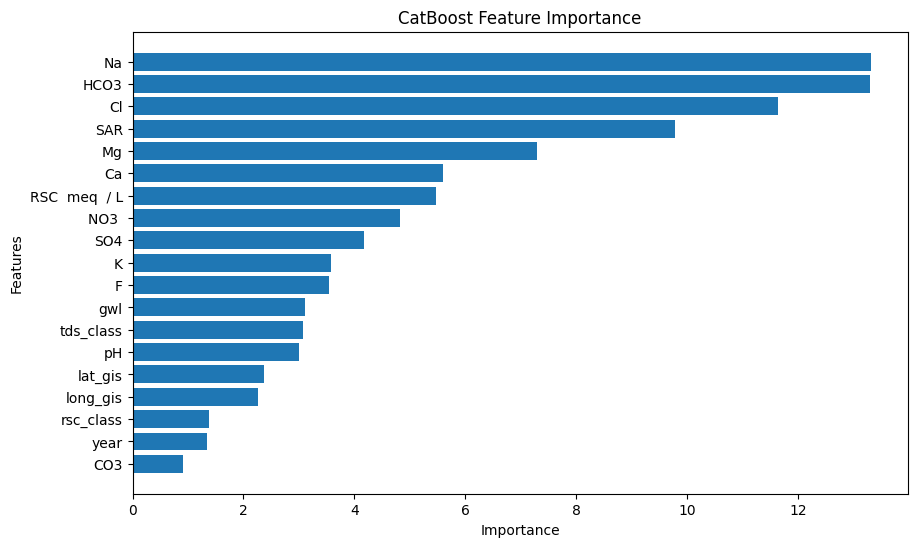

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances.values)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

### Sparrow Search Algorithm

In [ ]:
from mealpy import FloatVar, SSA

#### XGB

In [ ]:
ssa_xgb_model = SSA.OriginalSSA(epoch=100, pop_size=50, ST = 0.8, PD = 0.2, SD = 0.1)
g_best_ssa_xgb = ssa_xgb_model.solve(problem_dict_xgb)

In [ ]:
print(f"Solution: {g_best_ssa_xgb.solution}, Fitness: {g_best_ssa_xgb.target.fitness}")

In [ ]:
print("Best hyperparameters:", g_best_ssa_xgb.target.fitness)
print("n_estimators:", int(g_best_ssa_xgb.solution[0]))
print("max_depth:", int(g_best_ssa_xgb.solution[1]))
print("learning_rate:", float(g_best_ssa_xgb.solution[2]))
print("subsample:", float(g_best_ssa_xgb.solution[3]))
print("colsample_bytree:", float(g_best_ssa_xgb.solution[4]))
print("gamma:", float(g_best_ssa_xgb.solution[5]))
print("min_child_weight:", float(g_best_ssa_xgb.solution[6]))
print("reg_alpha:", float(g_best_ssa_xgb.solution[7]))

In [ ]:
# Define the best hyperparameters as a dictionary
best_hyperparameters_ssa_xgb = {
    'n_estimators': int(g_best_ssa_xgb.solution[0]),
    'max_depth': int(g_best_ssa_xgb.solution[1]),
    'learning_rate': float(g_best_ssa_xgb.solution[2]),
    'subsample': float(g_best_ssa_xgb.solution[3]),
    "colsample_bytree": float(g_best_ssa_xgb.solution[4]),
    "gamma": float(g_best_ssa_xgb.solution[5]),
    'min_child_weight': int(g_best_ssa_xgb.solution[6]),
    'reg_alpha': float(g_best_ssa_xgb.solution[7]),
    # 'device': 'cuda:0',
    # 'tree_method':'gpu_hist',
    # 'predictor': 'gpu_predictor',
    'verbose': 0,
}

In [ ]:
# Create a XGB classifier with the best hyperparameters
ssa_xgb_model = xgb.XGBClassifier(**best_hyperparameters_ssa_xgb)

# Train the model on your training data
ssa_xgb_model.fit(X_train, y_train, verbose = 1000 )

In [ ]:
xgb.plot_importance(ssa_xgb_model)
plt.figure(figsize = (16, 12))
plt.show()

#### CatBoost

In [ ]:
ssa_cb_model = SSA.OriginalSSA(epoch=100, pop_size=50, ST = 0.8, PD = 0.2, SD = 0.1)
g_best_ssa_cb = ssa_cb_model.solve(problem_dict_cb)


In [ ]:
print(f"Solution: {g_best_ssa_cb.solution}, Fitness: {g_best_ssa_cb.target.fitness}")

Solution: [1.70559493e+03 5.98851236e+00 9.67125960e-02 2.71830630e+01
 5.08962966e-01], Fitness: -0.9674457429048414


In [ ]:
# Now, best_hyperparameter_values is an array of hyperparameter values
# You can print it to see the best hyperparameters
# print("Best accuracy:", -best_accuracy)
print("Best hyperparameters:", g_best_ssa_cb.target.fitness)
print("iteration:", int(g_best_ssa_cb.solution[0]))
print("depth:", int(g_best_ssa_cb.solution[1]))
print("learning_rate:", float(g_best_ssa_cb.solution[2]))
print("min_data_in_leaf:", int(g_best_ssa_cb.solution[3]))
print("l2_leaf_reg:", float(g_best_ssa_cb.solution[4]))


Best hyperparameters: -0.9674457429048414
iteration: 1705
depth: 5
learning_rate: 0.09671259604950046
min_data_in_leaf: 27
l2_leaf_reg: 0.5089629662012042


In [ ]:
# Define the best hyperparameters as a dictionary
best_hyperparameters_ssa_cb = {
    'iterations': int(g_best_ssa_cb.solution[0]),
    'depth': int(g_best_ssa_cb.solution[1]),
    'learning_rate': float(g_best_ssa_cb.solution[2]),
    'min_data_in_leaf': int(g_best_ssa_cb.solution[3]),
    "l2_leaf_reg": float(g_best_ssa_cb.solution[4]),
    'class_weights': class_weights,  # Assuming you have class_weights defined
    'task_type': device_type,
    'devices': '0:1',
    'cat_features': cat_feat_idx,
    'verbose': 0,
}

In [ ]:
# Create a CatBoost classifier with the best hyperparameters
ssa_cb_model = CatBoostClassifier(**best_hyperparameters_ssa_cb)

# Train the model on your training data
ssa_cb_model.fit(train_pool , verbose = 1000 )

0:	learn: 1.5971742	total: 21.8ms	remaining: 37.1s
1000:	learn: 0.0057017	total: 11.4s	remaining: 8.01s
1704:	learn: 0.0023735	total: 18s	remaining: 0us


In [ ]:
importances = ssa_cb_model.get_feature_importance(type='PredictionValuesChange')
feature_importances = pd.Series(importances, index=X.columns).sort_values()

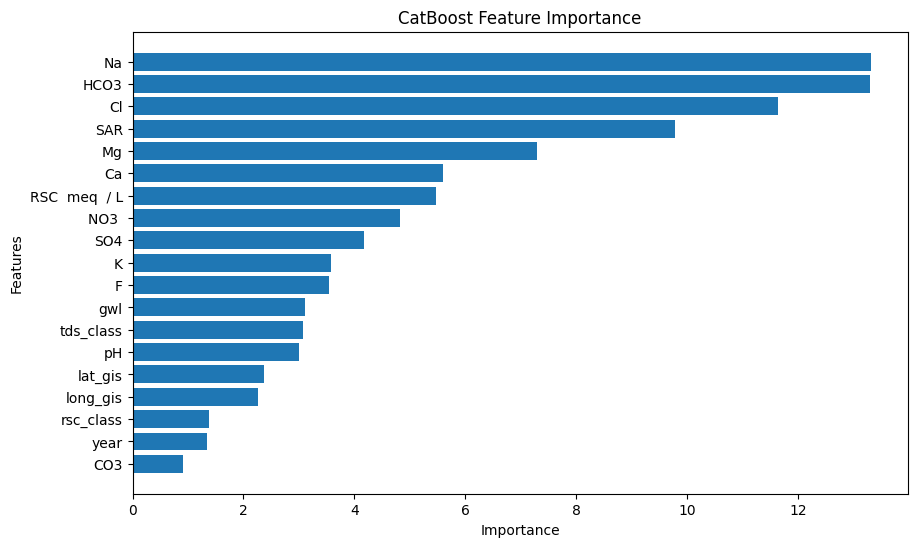

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances.values)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# <span style="color:#e74c3c;"> Results </span>


In [ ]:
from sklearn.metrics import roc_curve, auc

### XGB Model

In [ ]:
# predictions and scores

pred = xgb_model.predict(X_test)

r2_sr = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)

print('R2 Score :{0:.5f}'.format(r2_sr))
print('Mean Squared Error :{0:.5f}'.format(mse))

R2 Score :0.88931
Mean Squared Error :0.07262


In [ ]:
# Define a mapping dictionary from numeric labels to original labels
class_mapping = {
    0: 'Baik',
    1: 'Boleh Digunakan',
    2: 'Buruk',
    3: 'Marginal',
    4: 'Sangat Baik',
    5: 'Sangat Buruk'
}

# Create a list to store the original class labels for predictions and test labels
pred_original_labels = [class_mapping[label] for label in pred]
y_test_original_labels = [class_mapping[label] for label in y_test]

# classification report
clf_report_xgb = classification_report(pred_original_labels, y_test_original_labels)

print(clf_report_xgb)

                 precision    recall  f1-score   support

           Baik       0.97      0.96      0.96       266
Boleh Digunakan       0.97      0.97      0.97       764
          Buruk       0.93      0.93      0.93       118
       Marginal       0.79      0.90      0.84        30
    Sangat Baik       1.00      1.00      1.00         5
   Sangat Buruk       1.00      0.93      0.97        15

       accuracy                           0.96      1198
      macro avg       0.94      0.95      0.95      1198
   weighted avg       0.96      0.96      0.96      1198



### Cat Boost Base Model

In [ ]:
# predictions and scores

pred = cb_model.predict(test_pool)

r2_sr = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)

print('R2 Score :{0:.5f}'.format(r2_sr))
print('Mean Squared Error :{0:.5f}'.format(mse))

R2 Score :0.79389
Mean Squared Error :0.13523


In [ ]:
# classification report

clf_report_cb = classification_report(pred, y_test)

print(clf_report_cb)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       264
           1       0.96      0.98      0.97       750
           2       0.93      0.92      0.92       120
           3       0.91      0.79      0.85        39
           4       1.00      0.50      0.67        10
           5       1.00      0.93      0.97        15

    accuracy                           0.96      1198
   macro avg       0.96      0.85      0.89      1198
weighted avg       0.96      0.96      0.96      1198



### Base With SI

#### XGBoost

##### PSO

In [ ]:
# predictions and scores

pred = pso_xgb_model.predict(X_test)

r2_sr = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)

print('R2 Score :{0:.5f}'.format(r2_sr))
print('Mean Squared Error :{0:.5f}'.format(mse))

R2 Score :0.90967
Mean Squared Error :0.05927


In [ ]:
# classification report

clf_report = classification_report(pred, y_test )

print(clf_report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       262
           1       0.98      0.97      0.98       773
           2       0.93      0.96      0.95       114
           3       0.79      0.93      0.86        29
           4       1.00      1.00      1.00         5
           5       1.00      0.93      0.97        15

    accuracy                           0.97      1198
   macro avg       0.95      0.96      0.95      1198
weighted avg       0.97      0.97      0.97      1198



##### ABC

In [ ]:
# predictions and scores

pred = abc_xgb_model.predict(X_test)

r2_sr = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)

print('R2 Score :{0:.5f}'.format(r2_sr))
print('Mean Squared Error :{0:.5f}'.format(mse))

R2 Score :0.92366
Mean Squared Error :0.05008


In [ ]:
# classification report

clf_report = classification_report(pred, y_test )

print(clf_report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       259
           1       0.99      0.97      0.98       776
           2       0.93      0.96      0.95       114
           3       0.82      0.97      0.89        29
           4       1.00      1.00      1.00         5
           5       1.00      0.93      0.97        15

    accuracy                           0.97      1198
   macro avg       0.95      0.97      0.96      1198
weighted avg       0.97      0.97      0.97      1198



#### Catboost

#### PSO

In [ ]:
# predictions and scores

pred = pso_cb_model.predict(test_pool)

r2_sr = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)

print('R2 Score :{0:.5f}'.format(r2_sr))
print('Mean Squared Error :{0:.5f}'.format(mse))

R2 Score :0.85368
Mean Squared Error :0.09599


In [ ]:
# classification report

clf_report = classification_report(pred, y_test )

print(clf_report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       262
           1       0.98      0.98      0.98       760
           2       0.94      0.95      0.94       117
           3       0.91      0.86      0.89        36
           4       1.00      0.62      0.77         8
           5       1.00      0.93      0.97        15

    accuracy                           0.97      1198
   macro avg       0.97      0.89      0.92      1198
weighted avg       0.97      0.97      0.97      1198



#### ABC

In [ ]:
# predictions and scores

pred = abc_cb_model.predict(test_pool)

r2_sr = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)

print('R2 Score :{0:.5f}'.format(r2_sr))
print('Mean Squared Error :{0:.5f}'.format(mse))

R2 Score :0.87531
Mean Squared Error :0.08180


In [ ]:
# classification report

clf_report = classification_report(pred, y_test )

print(clf_report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       264
           1       0.97      0.98      0.98       759
           2       0.93      0.94      0.94       117
           3       0.91      0.86      0.89        36
           4       1.00      0.71      0.83         7
           5       1.00      0.93      0.97        15

    accuracy                           0.97      1198
   macro avg       0.96      0.90      0.93      1198
weighted avg       0.97      0.97      0.97      1198



## Save Model

### Base Model

In [ ]:
base_model.save_model('model_catboost.cbm',format="cbm")

### Base with SI

In [ ]:
model.save_model(f'model_pso_catboost_{pso_iteration}iter.cbm', format="cbm")